## 타이타닉 튜토리얼1 - Exploratory data analysis, visualization, machine learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn') #matploblib의 기본 scheme말고 seaborn scheme 사용
sns.set(font_scale=2.5) #일일이 graph font size 지정할 필요 없이 seaborn font_scale 사용

import missingno as msno #결측치 시각화에 필요한 라이브러리

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
# Rich output(도표,소리,애니메이션 등)을 셀 아래 inline으로 표시(ipython)

#### 1. Dataset 확인
- python에서 테이블화 된 데이터를 다루는 데 가장 최적화 되어 있으며 많이 쓰이는 라이브러리는 pandas
- 캐글에서 데이터셋은 보통 train, test set으로 나뉘어짐

In [3]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 각 변수에 대한 정의와 설명, 타입 등을 파악해야
- 우리가 다루는 문제에서 feature는 Pclass, Age, SibSp, Parch, Fare 이며(나머지는??), 예측하려는 target label 은 Survived

In [6]:
df_train.describe()
# describe() -> 각 feature가 가진 통계치들을 반환

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


1.1 Null data check
- 위의 데이터들을 살펴보면 null data가 존재하는 feature가 있는는 듯
- null data를 시각화

In [8]:
for col in df_train.columns:
  msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
  print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [9]:
for col in df_test.columns:
  msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
  print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


- train, test set에서 age(둘다 약 20%), Cabin(둘다 약 80%), Embarked(Train만만 0.22%)에 null data 존재

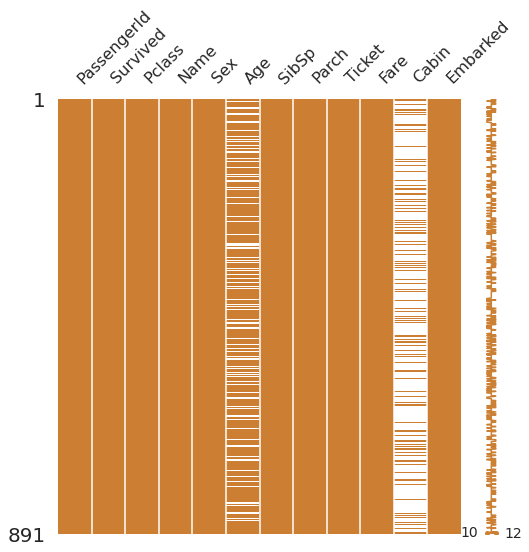

In [11]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))
#흰색 빈 공간이 결측값

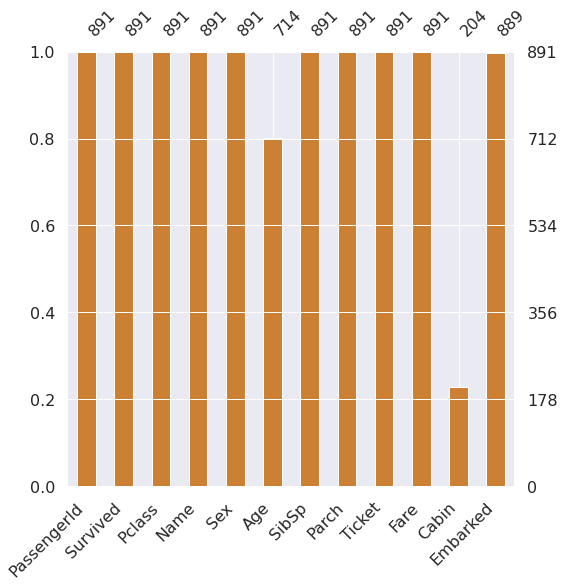

In [13]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))
# 좌측은 percentage, 그래프 내 최상단에 위치한 숫자는 결측치가 아닌 데이터 숫자
# 우측 y축 숫자는 샘플의 갯수

1.2 Target label 확인
- target label이 어떤 distribution을 가지고 있는지 확인 필요
- binary classification 문제의 경우에서 1과 0의 분포가 어떠냐에 따라 모델의 평가방법이 달라질 수 있음

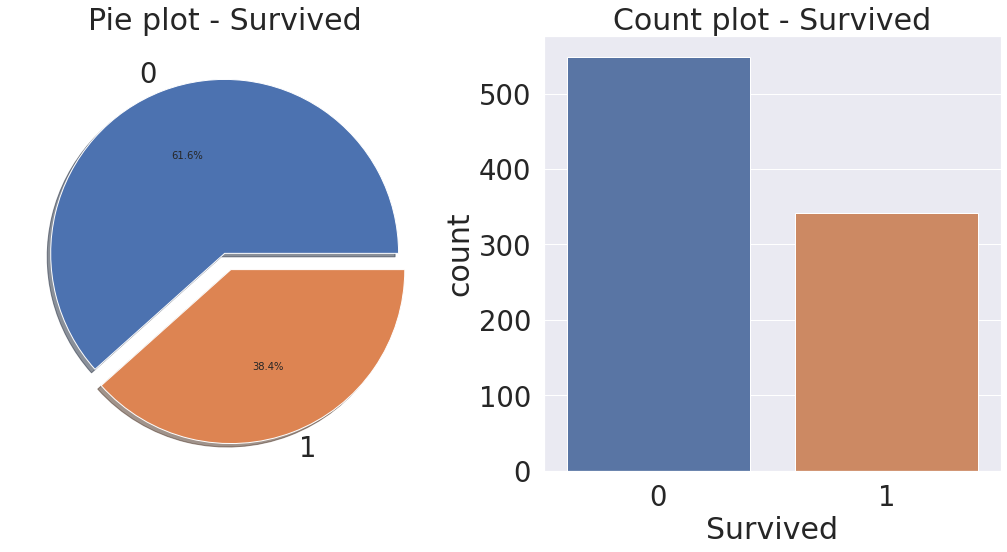

In [14]:
#####
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 38.4%만이 살아남음
- target label 분포가 balanced한 편
- 불균일한 경우(100 중 1이 99, 0이 1개인 경우에는 모든 것을 1이라고 해도 정확도가 99% -> 0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없음)

#### 2. Exploratory data analysis
- 본격적인 데이터 분석 시작
- 적절한 시각화 필요
- 시각화 라이브러리: matplotlib, seaborn, plotly 등

2.1 Pclass(티켓의 클래스)
- 1,2,3 클래스로 나뉨, categorical feature
- Pclass는 ordinal, 서수형 데이터(카테고리이면서 순서가 있는 데이터 타입)
    
- Pclass에 따른 생존율 차이 -> pandas dataframe에서는 groupby 사용, pivot 메서드
- 'Pclass', 'Survived'를 가져온 후 pclass로 묶기, 각 pclass마다 0,1이 count되는데 이를 평균내면 pclass별 생존률이 나옴

In [15]:
##### as_index=True
# 각 class에 몇 명이 있는지
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [16]:
# 생존: survived=1
# 각 class별 몇 명이 생존했는지
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [18]:
# pandas crosstab 사용
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


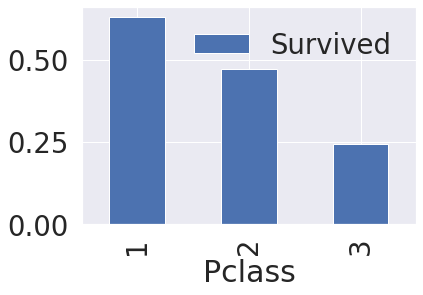

In [19]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

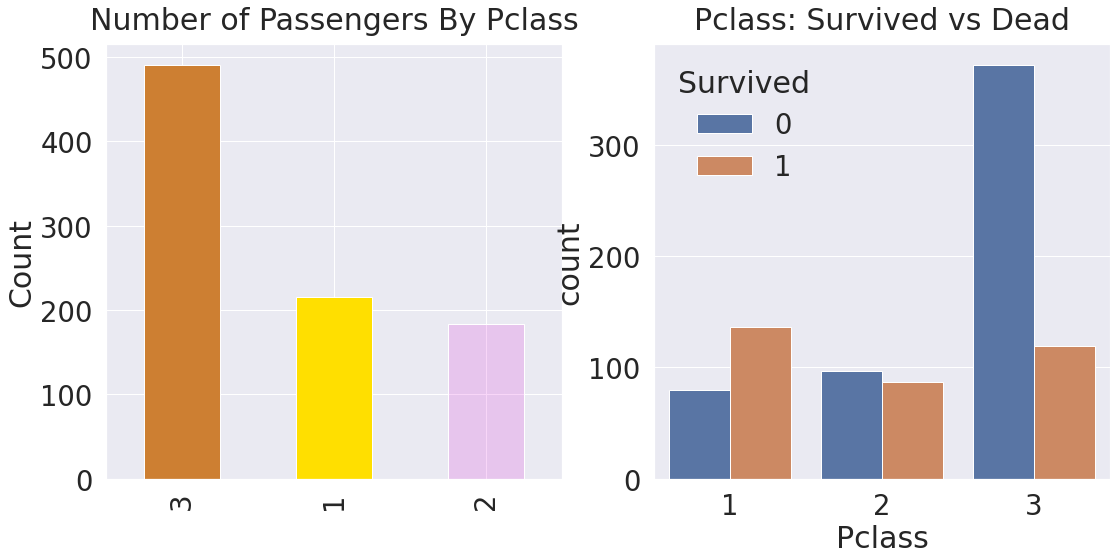

In [20]:
#####
# seaborn의 countplot을 이용하면 특정 label에 따른 개수를 확인해 볼 수 있음
y_position = 1.02
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

- 클래스가 높을수록 생존 확률이 높음(63%, 48%, 25%)
- Pclass가 생존에 큰 영향을 미친다고 생각할 수 있음, 나중에 모델을 세울 때 이 feature를 사용하는 것이 좋을 것이라 판단 가능

2.2 Sex
- 각 성별에 따른 생존율 확인

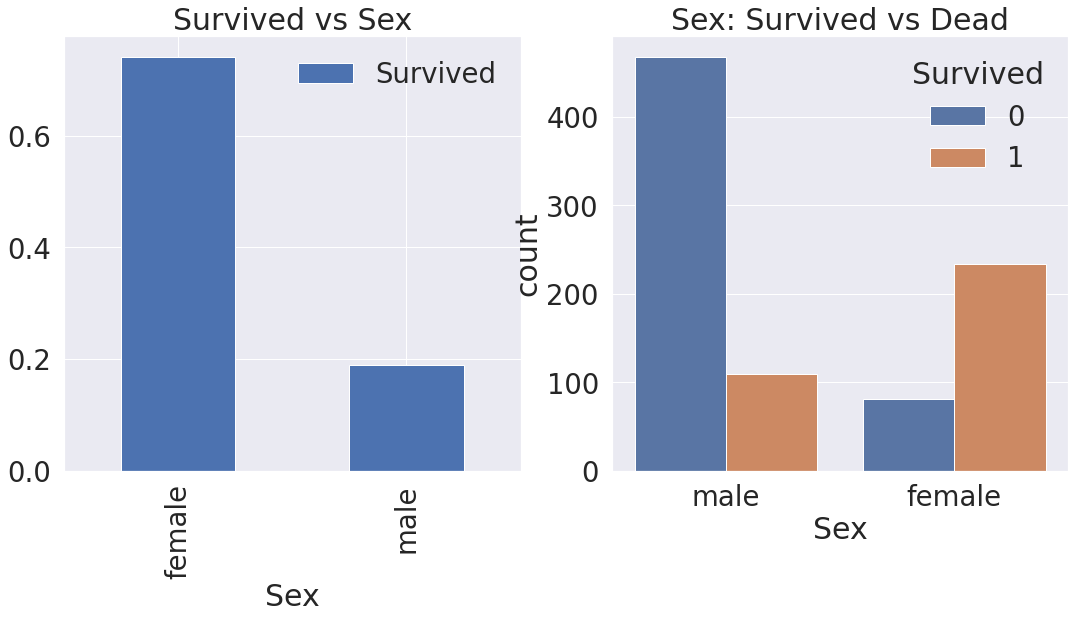

In [21]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- 여자가 생존할 확률이 높음

In [23]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [24]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- Pclass와 마찬가지로 Sex도 예측 모델에 쓰일 중요한 feature

2.3 Both Sex and Pclass
- Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는지
- seaborn factorplot 사용하면 쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있음

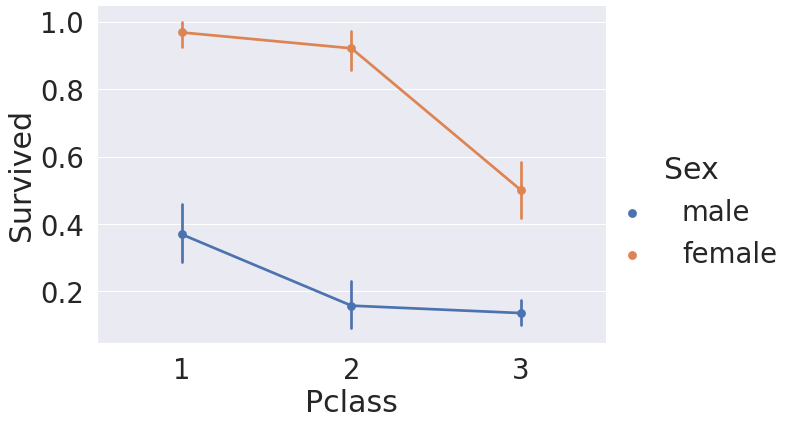

In [25]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train,size=6,aspect=1.5)

- 모든 클래스에서 female이 살 확률이 male보다 높은 걸 알 수 있음
- 성별 상관없이 클래스가 높을수록 살 확률이 높음

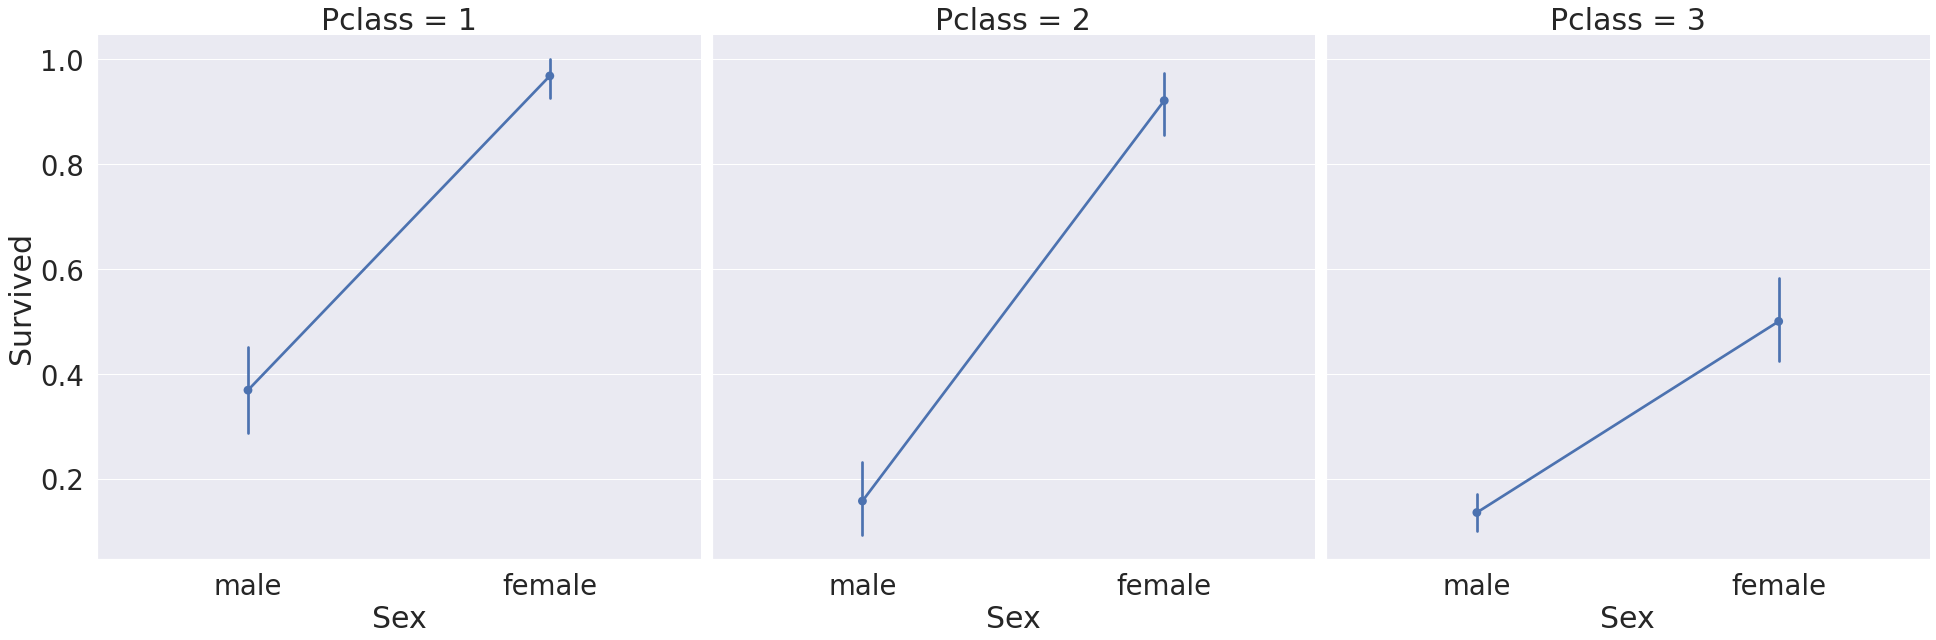

In [26]:
# hue 대신 column으로
sns.factorplot(x='Sex',y='Survived',col='Pclass',data=df_train,satureation=.5,size=9,aspect=1)

2.4 Age